In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy

#### Generate test data

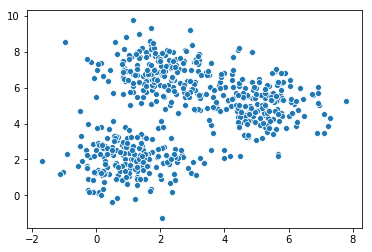

In [46]:
c1 = np.array([1, 2])
c2 = np.array([5, 5])
c3 = np.array([2, 7])

cluster1 = np.random.randn(200, 2) + c1
cluster2 = np.random.randn(200, 2) + c2
cluster3 = np.random.randn(200, 2) + c3

data = np.concatenate([cluster1, cluster2, cluster3], axis=0)
ax = sns.scatterplot(x=data[:, 0], y=data[:, 1])
plt.show()

#### Initialize original centers for k-means

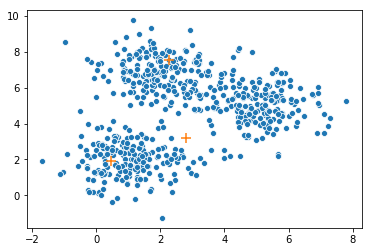

In [47]:
k = 3
m = data.shape[0]
c = data.shape[1]

mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
centers = np.random.randn(k, c) * std + mean

ax = sns.scatterplot(x=data[:, 0], y=data[:, 1])
ax.scatter(x=centers[:, 0], y=centers[:, 1], marker="+", s=100)
plt.show()

#### Interate unitl converage

In [48]:
last_center = np.zeros((k, c))
cur_center = centers

clusters = np.zeros(m)
distances = np.zeros((m, k))
error = np.linalg.norm(cur_center - last_center)

while error != 0:
    for i in range(k):
        distances[:, i] = np.linalg.norm(data - cur_center[i], axis=1)
    clusters = np.argmin(distances, axis=1)
    last_center = deepcopy(cur_center)
    
    for i in range(k):
        cur_center[i] = np.mean(data[clusters==i], axis=0)
    error = np.linalg.norm(cur_center - last_center)
    print(error)

2.0741669560664473
1.0263764518258771
0.14385274450399643
0.049226666136403543
0.04431418384122054
0.0


#### Show result

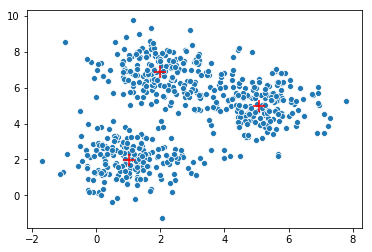

In [49]:
ax = sns.scatterplot(data[:,0], data[:,1])
ax.scatter(cur_center[:,0], cur_center[:,1], marker='+', c='r', s=150)
plt.show()